In [4]:
! pip install captum --quiet
! pip install pytorch-lightning --quiet
! pip install torch torchvision captum pandas sklearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 32.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


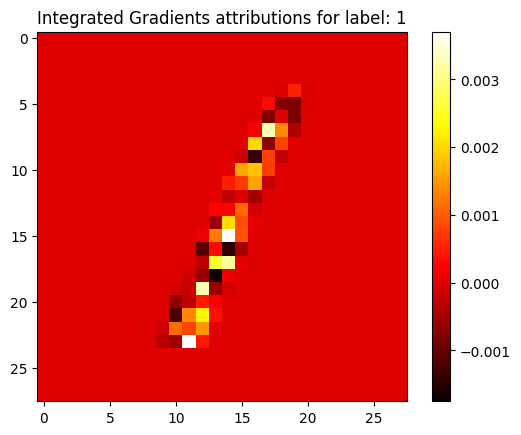

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from captum.attr import IntegratedGradients
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define Simple CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train and save the model
def train_and_save_model():
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

    # Train model for 1 epoch (for demonstration)
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        break  # Only training on one batch for demonstration

    # Save the model
    torch.save(model.state_dict(), "simple_cnn.pth")
    print("Model trained and saved as 'simple_cnn.pth'")

# Function to load the model
def load_model():
    model = SimpleCNN()
    model.load_state_dict(torch.load("simple_cnn.pth", map_location=torch.device('cpu')))
    model.eval()
    return model

# Function to get integrated gradients
def get_integrated_gradients(model, image, target_label):
    baseline = torch.zeros_like(image)
    integrated_gradients = IntegratedGradients(model)
    attributions, _ = integrated_gradients.attribute(image, baseline, target=target_label, return_convergence_delta=True)
    return attributions.squeeze().detach().numpy()
